In [11]:
# coding: utf-8
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [12]:
DataFileDataFile = "F:\\Projects\\Git\\TSP\\data\\1711.csv"
df = read_csv(DataFileDataFile, names=['date', 'crossid', 'count'])

In [13]:
df

,date,crossid,count
0,2017-11-15 16:50,275,348
1,2017-11-28 12:50,1036,6
2,2017-11-16 06:40,230,455
3,2017-11-08 14:50,195,2051
4,2017-11-30 10:50,193,432
5,2017-11-14 07:40,203,447
6,2017-11-08 12:40,224,55
7,2017-11-18 08:40,194,600
8,2017-11-16 07:30,208,546
9,2017-11-03 09:20,165,92


In [14]:
df275 = df[df['crossid']==275].sort_values(by='date')
df275.index = range(1,len(df275) + 1) 

In [15]:
dataset = df275['count'].values.astype('float32')

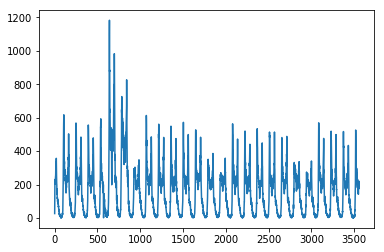

In [16]:
plt.plot(dataset)
plt.show()

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

In [18]:
#convert an array of valus to dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX), numpy.array(dataY)


In [19]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1 , trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [21]:
trainY

array([[0.13801862],
       [0.18966976],
       [0.17019475],
       ...,
       [0.21253175],
       [0.211685  ],
       [0.2074513 ]], dtype=float32)

In [22]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
 - 3s - loss: 0.0033
Epoch 2/100
 - 3s - loss: 0.0012
Epoch 3/100
 - 3s - loss: 0.0011
Epoch 4/100
 - 3s - loss: 0.0011
Epoch 5/100
 - 3s - loss: 0.0011
Epoch 6/100
 - 3s - loss: 0.0010
Epoch 7/100
 - 3s - loss: 0.0010
Epoch 8/100
 - 3s - loss: 9.9437e-04
Epoch 9/100
 - 3s - loss: 9.7237e-04
Epoch 10/100
 - 3s - loss: 9.6768e-04
Epoch 11/100
 - 3s - loss: 9.5488e-04
Epoch 12/100
 - 3s - loss: 9.5388e-04
Epoch 13/100
 - 3s - loss: 9.4986e-04
Epoch 14/100
 - 3s - loss: 9.4506e-04
Epoch 15/100
 - 3s - loss: 9.5221e-04
Epoch 16/100
 - 3s - loss: 9.3575e-04
Epoch 17/100
 - 3s - loss: 9.3454e-04
Epoch 18/100
 - 3s - loss: 9.5118e-04
Epoch 19/100
 - 3s - loss: 9.4855e-04
Epoch 20/100
 - 3s - loss: 9.3841e-04
Epoch 21/100
 - 3s - loss: 9.1689e-04
Epoch 22/100
 - 3s - loss: 9.4679e-04
Epoch 23/100
 - 3s - loss: 9.2424e-04
Epoch 24/100
 - 3s - loss: 9.2610e-04
Epoch 25/100
 - 3s - loss: 9.4677e-04
Epoch 26/100
 - 3s - loss: 9.2575e-04
Epoch 27/100
 - 3s - loss: 9.3467e-04
Epoch 28/10

In [23]:
trainPredict = model.predict(trainX)

In [24]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)

In [25]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)

In [26]:
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 37.44 RMSE


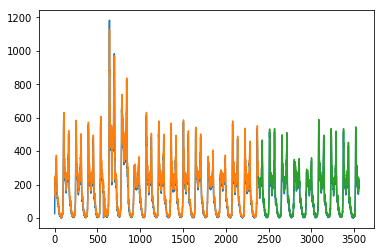

In [27]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()

